# Data Intelligence Application Project

## Introduction
In this project we study the MAB approaches for both pricing and advertising applications, combining also them in a unique algorithm. <br>


The first part is only pay-per-click advertising, in which we want to maximize the number of users that clicks an advertising banner given a budget constraint. An advertising campaign is characterized by its subcampaigns each with a different targeting class of user. <br>


In the second part we focus on the pricing application, where a seller needs to identify the best price for a good to sell that maximizes the profit without knowing the buyer demand. This is an interesting problem from the seller point of view, since the profit depends by the pricing policy and the best pricing policy is determined by the buyers' preferences, which are usually unknown a priori, based on it category. To deal with this particular problem we implement a context generation. <br>In this project we make the assumption that the conversion probability that is, the probability that a buyer purchases the good, is decreasing as the price increase, the same behaviour of the most of the common goods in the market.<br>

The third and last part aims to combining both the allocation of budget and solve the pricing problem, in a scenario in which the two algorithms work at the same time.<br>

We decided to analyze as product to place on the market a new streaming platform of film and series. So we found on internet some data about competitors (like Netflix, Dinsey+ etc) to understand the parameter that are realistic in order to build a realistic model (like the average in the last 5 years of number of user, money for the marketing and price of the product).<br> We think that this is a good product to analyze because it fits quite well with the parameters to settle by the experiment (the correct price and the possibility of diversifying the prices for group of users and the cost of the different marketing campaign) because we think that the price of the subscription could be changed more easily than a real object that is affected by the cost of production. Also it is simpler to make different price for a product that needs a subscription and not a one-time-buy object.<br>

After we saw the real data of the composition of the users of the competitors, we decided to analyze those different classes:<br> 


|       | Familiar | Not Familiar |
|-------|----------|--------------|
| **Young** | x        | x            |
| **Adult** | x        |              |

Young & Familiar, Adult & Familiar, Young & Not Familiar. The fourth combination of features, Adult & Not Familiar is not considered, because we thought that it is the least probable class that can be observed in customers of this kind of services.

So the two key features are age and whether the person is familiar or not with streaming platforms.<br>

We tried to match the three classes of users to three different campaigns. We think that Social Network are the best place for recruiting new users (so non-familiar) that are young due to the massive use of social Network by young people. <br>Search Advertising is more related to people that are familiar, so the decision is to use this campaign to target the young familiar, because younger people are probably more aware of how use search engine.<br> The last group of users, the adult familiar,  are targeted by Display Advertising because we think that they will consult site with ads to know more about their interest (like e-journal or similar) and so this type of campaign is better for them than the others.<br>

Regarding the three abrupt phases affecting the advertising problem, we decide to work in a setting in which the sum of the three phases cover a hole week. In this way we can generate phases quite different one from each others.<br> The first one is Morning during the week. It goes from 00-12 AM. The second one is Evening during the week. The last one is the hole weekend. We suppose that the different type of users have different reaction to the three phases and so we have to make different phases.<br> We think that within a phase the users will act more or less in the same way. This could be a too simple assumption (at 3 am the action of the users will not be the same as at 10 am) but could actually work in the model because every phases have the same amount of sleep time and awake time, so no phases will be affected in the reality to a very different number of click during a sub-phase from the numbers that are supposed in our model, but the number of click will be more grouped in a single fraction the sub-fase, while we suppose that this number is constant. 

In [22]:
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import itertools
import pandas as pd
from scipy import stats
from scipy.interpolate import interp1d
from Advertising.environment.Advertising_Config_Manager import *
from Pricing.Pricing_Config_Manager import *

aux_dict = {0:"Young-Familiar", 1: "Adult-Familiar", 2:"Young-NotFamiliar"}
colors = ['r', 'g', 'b']
price_env_id = 0
adv_env_id = 0
figsize = (14,8)

## Conversion Rate plots
The conversion rate of each class can be modified from the configuration file, changing the matrix of probabilities. <br>
We have decided these as default conversion rates because they best represent the will of different types of users to purchase the product at the various price tags. 

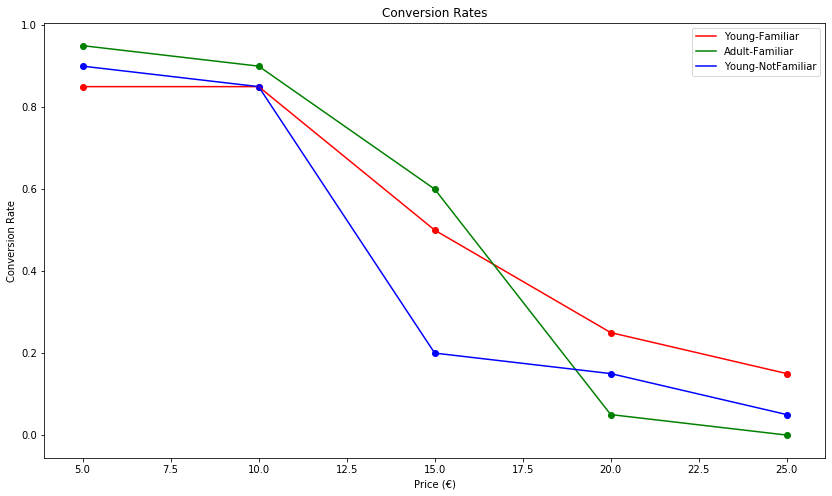

In [18]:
env = Pricing_Config_Manager(price_env_id)

plt.figure(figsize=figsize)
x = env.prices
categories = env.categories

for i in range(len(categories)):
    y = env.probabilities[i]
    smooth = interp1d(x, y, kind='cubic')
    plt.plot(x, smooth(x), color=colors[i], label = aux_dict[i])
    plt.scatter(x, y, color=colors[i])
    plt.title("Conversion Rates")
    plt.xlabel("Price (€)")
    plt.ylabel("Conversion Rate")

plt.legend()
plt.show()



## Click Functions plots
These functions return the number of clicks as the budget spent on the advertising campaign changes. As we have seen during lecture they are monotonically increasing until they reach a certain value.<br>
The function representing them is: $$m(1-e^{sx})$$
where \\(m\\) is the maximum value that the number of clicks can reach and \\(s\\) modify the slope of the curve, with \\(0 \lt s\lt1\\).

In [19]:
env = Advertising_Config_Manager(adv_env_id)

budgets = np.linspace(0, 10, num=11)
x = np.linspace(0,max(budgets), num=550)
feature_labels = env.feature_labels
phase_labels = env.phase_labels
phase_weights = env.get_phase_weights()

### Single phase


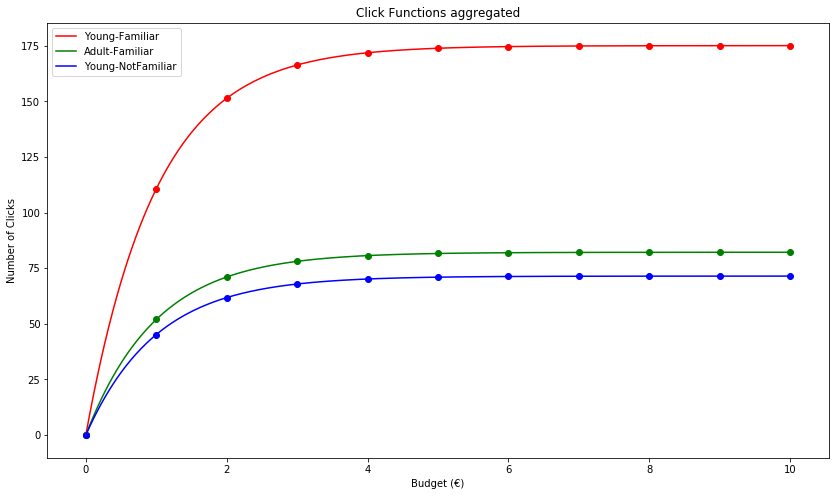

In [20]:
plt.figure(figsize=figsize)

for i,label in enumerate(feature_labels):
    y = []
    scatter = []
    for j, phase in enumerate(phase_labels):
        y.append(env.click_functions[label][j](x)*phase_weights[j])
        scatter.append(env.click_functions[label][j](budgets)*phase_weights[j])
    aggr_y = sum(y)
    aggr_scatter = sum(scatter)

    plt.plot(x, aggr_y, color=colors[i], label = label)
    plt.scatter(budgets, aggr_scatter, color=colors[i])
    plt.title("Click Functions aggregated")
    plt.xlabel("Budget (€)")
    plt.ylabel("Number of Clicks")
    plt.legend()
    

### Three Abrupt phases

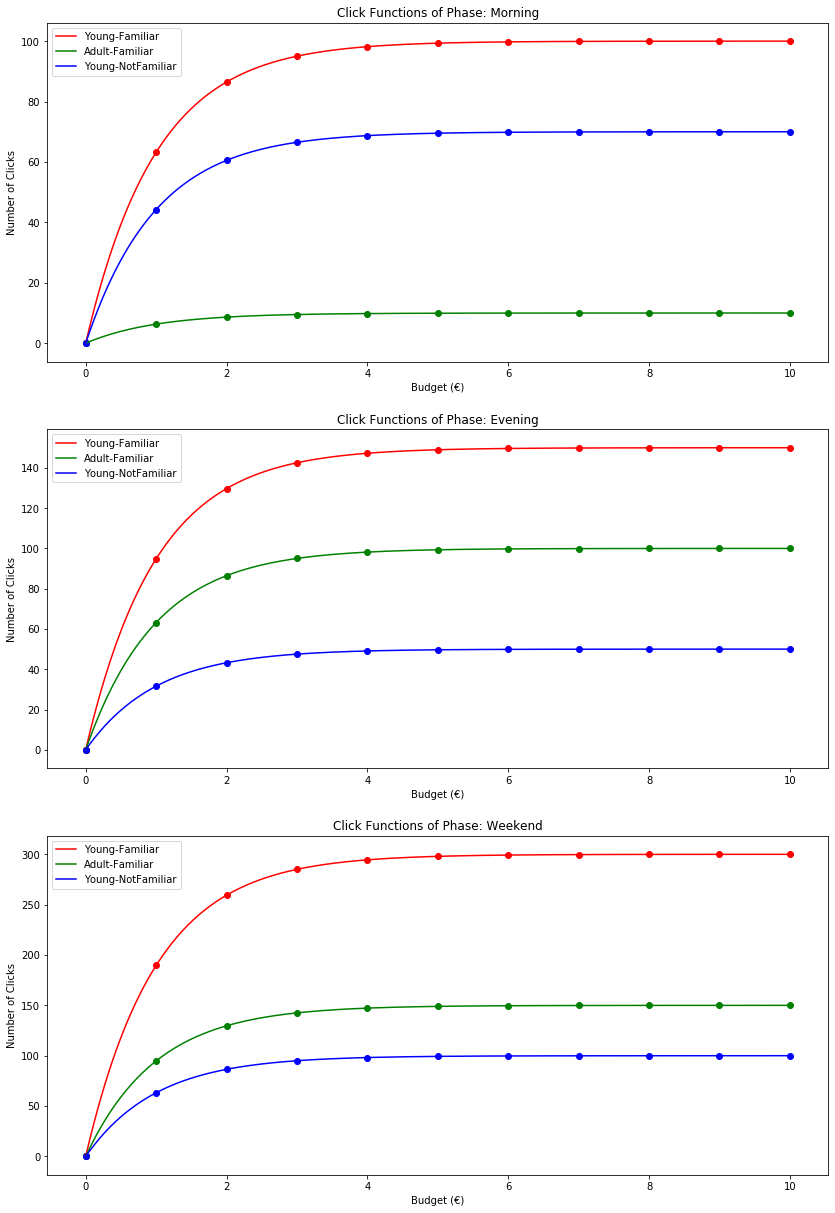

In [21]:
fig, axs = plt.subplots(3, figsize=figsize)
plt.subplots_adjust(bottom=0.5, top = 2.5)
for i,label in enumerate(feature_labels):
    for j, phase in enumerate(phase_labels):
        y = env.click_functions[label][j](x)
        scatters = env.click_functions[label][j](budgets)
        axs[j].plot(x, y, color=colors[i], label = label)
        axs[j].scatter(budgets, scatters, color=colors[i])
        axs[j].set_title("Click Functions of Phase: " +phase )
        axs[j].set_xlabel("Budget (€)")
        axs[j].set_ylabel("Number of Clicks")
        axs[j].legend()
    

## 2. Advertising campaign

An **advertising campaign** is a series of advertisement messages launched on different media channels to advertise a product/service.
It is characterized by a set of **subcampaigns**, each with a potentially different pair (ad, targeting), and by a **cumulative daily budget**. 

We'll focus on _pay-per-click_ advertising where an advertiser pays only once a user has clicked on his ad. To get an ad impressed, the advertiser take part in an auction, specifying a bid and a daily budget for each subcampaing. The advertiser's goal is to partition the cumulative daily budget over the subcampaigns in order to maximize the number of ad impressed, hence the expected revenue obtained by the advertisign campaign. 

_Note:_ we'll implicitly assume that the _bid value_ is automatically computed by the advertising platform once the daily budget is fixed.

## Optimization Problem

### Assumptions

1. The performance of every subcampaign is independent of the performance of the other subcampaigns
2. The values of bid and daily budget are finite

### Formal Model

*  $\max_{x_{j,t}, y_{j,t}} \sum_{j=1}^N v_{j} n_{j}(x_{j,t}, y_{j,t})$
  
  such that: 
  * $ \sum_{j=1}^N y_{j,t} \leq \bar{y}_{t}$, $\forall t \in T$

  * $\underline{x}_{j,t} \leq x_{j,t} \leq \bar{x}_{j,t}, \forall {j \in N}, \forall t \in T$
  
  * $\underline{y}_{j,y} \leq y_{j,t} \leq \bar{y}_{j,t}, \forall j \in N, \forall t \in T$
  
  where

  * $N$ number of subcampaigns
  * $C = \left\{C_{1}, ..., C_{N}\right\}$ advertising campaign
  * $T$ time horizon 
  * $t \in T$ instant of time 
  * $x_{j,t}$ bid of subcampaign *$C_{j}$* at time *t*
  * $y_{j,t}$ daily budget of subcampaign *$C_{j}$* at time *t*
  * $v_{j}$ value per click (impression) of subcampaign *$C_{j}$*
  * $n_{j}(x_{j}, y_{j})$ number of clicks (impressions) of subcampaign   *$C_{j}$* given the values of bid $x_{j}$ and budget $y_{j}$
  * $\bar{y}_{j}$ cumulative daily budget constraint
  * $\left[\underline{x}_{j,t}, \bar{x}_{j,t}\right]$ box constraints for the bid of subcampaign *$C_{j}$* at time *t*
  * $\left[\underline{y}_{j,t}, \bar{y}_{j,t}\right]$ box constraints for the budget of subcampaign *$C_{j}$* at time *t*

### Our Scenario

* Our advertising campaign is composed of 3 subcampaign with a cumulative budget of 10M €. 
* We execute the experiment over a week that is composed of 56 instants of time (8 for each half-day). 
* In the beginning we'll use a unique value per click (i.e. $v_{j}$=1) in order to maximize the total number of clicks, while at the end of the notebook we'll combine the advertising scenario together with the pricing scenario. 
* The budget constraint on each subcampaing will vary from 0 to the cumulative daily budget, in 11 evenly spaced values ($y_{j,t}\in[0,10]$).

In [52]:
advertising_env_id = 0 # id of the campaign to use

max_budget = 10 # maximal amount of budget
n_arms = 11 # number of equispaced values in which the budget is subdivided, starting from 0

sample_factor = 8 # number of samples in an half-day
horizon= 14 * sample_factor

import numpy as np
np.random.seed(1234)

In [53]:
from experiment_2 import *
exp2 = Experiment_2(max_budget, n_arms, advertising_env_id)

### Algorithm: Knapsack

In each instant of time $t \in T$:
1. The algorithm receives in input a table of values $v_{j} n_{j}(x_{j,t}, y_{j,t})$ for each value of bid $x_{j,t}$ and budget $y_{j,t}$
2. For each row, it selects the value of bid that maximize the cell's value
3. Once removed the dependency of the bid values, it constructs a second table where each row includes the expected revenue for different values of budget
4. A third table is constructed by considering a new subcampaing at a time. The value in each cell $(i,j)$ represent the maximum expected revenue obtained by splitting the budget $y_{j}$ between the subcampaing $C_{i}$ and the previous row.
5. The optimal revenue can be found by looking for the maximum value in the last row.
6. The optimal budget partition can be found by proceeding backward from the last row to the initial one.

Let's consider the clairvoyant solution, and let's see how the knapsack algorithm subdivide the cumulative daily budget (here 10) over the 3 subcampaigns, in order to found out the highest number of clicks.

In [54]:
exp2.run_clairvoyant()

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,Budget
C0,0.000,110.621,151.316,166.287,171.795,173.821,174.566,174.840,174.941,174.978,174.992,4
C1,0.000,51.924,71.026,78.053,80.638,81.589,81.939,82.068,82.115,82.133,82.139,3
C2,0.000,45.151,61.762,67.872,70.120,70.947,71.252,71.363,71.405,71.420,71.425,3


By giving 4M € to the first campaign, and 3M € to the others, we'll reach the maximul number of 171.795+78.053+67.872 = 317,72 thousand clicks.

## Combinatorial GP bandits
We put together combinatorial bandits with Gaussian Processes.

### Gaussian Processes
If we discrete the click-function curves and we estimate the values of each points, the number of samples required will be too large. By assuming that there is correlation among the points, we can use Gaussian Processes (GPs) to learn these functions. Given a set of samples in the 2D space (budget, clicks) and setting a kernel (usually Gaussian) a GP is able to provide a probability distribution over the results. This probabiliy distribution is crucial in order to assure the convergency of bandit algorithms. The kernel used by a GP has some hyperparameters that can be learned before the actual run, using a set of random samples. In particular we use this approach in the stationary case and we leave the algorithm independently learn these hyperparameters in the non stationary case.


### Combinatorial GP Bandits
In a standard basic bandit problem we can pull a single arm over a set of arms and we observe the reward of the pulled arm. Instead, our arms are correlated and the reward of an arm provides information on the reward of the arms close to it.
A combinatorial GP bandits algorithm allows to pull any set of arms satisfying some combinatorial constraint.


### Our scenario
We model every subcampaign with a **Gaussian Process-Thompson Sampling (GP-TS)** as explained below. Our combinatorial constraint is represented by the **knapsack constraint** that force the cumulative daily budget to be no longer than a given value. Hence, we can at most an arm for each subcampaign such that the sum of them satisfy the knapsack constraints.

**Combinatorial GP-TS algorithm**

 At every time $t \in T$
 1. For every subcampaign *$j \in N$*, for every arm $a \in A$:
 
      $\tilde{n}_{a,j} \leftarrow Sample(\mathbb P(\mu_{a,j}=n_{a,j}))$
      
      
 2. Execute the Knapsack algorithm
 
      $\left\{\hat{y}_{j}\right\}_{j \in N} \leftarrow Knapsack(\left\{(v_{j} \tilde{n}_{a,j}(y), \bar{y}_{j}\right\}_{j \in N})$
 
 
 3. For every subcampaign *$j \in N$*, play arm $\hat{y}_{j}$
 
 
 4. Update the GP according to the observed rewards so far

Let's run an experiment and see how the Guassian Processes perform on each subcampaign.

Performing experiment:  1


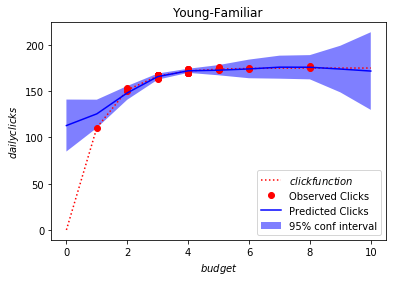

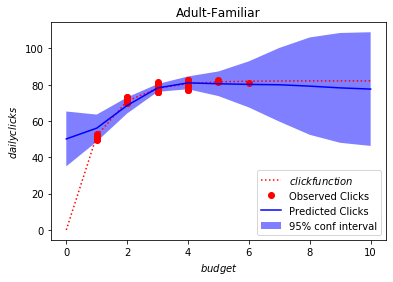

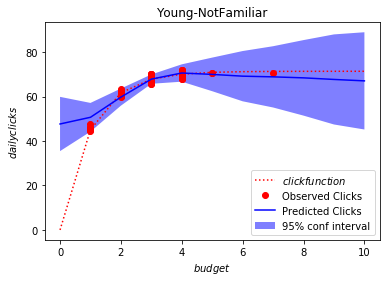

In [55]:
exp2.run(1, horizon, GP_graphs=True)

## Results of the stationary experiment

To obtain a more precise result we perform multiple experiments and we average the estimated click values.
After that we plot the average values of regrets and rewards.

In [56]:
n_experiments= 10 # number of experiment to perform

exp2.run(n_experiments, horizon)

Performing experiment:  1
Performing experiment:  2
Performing experiment:  3
Performing experiment:  4
Performing experiment:  5
Performing experiment:  6
Performing experiment:  7
Performing experiment:  8
Performing experiment:  9
Performing experiment:  10


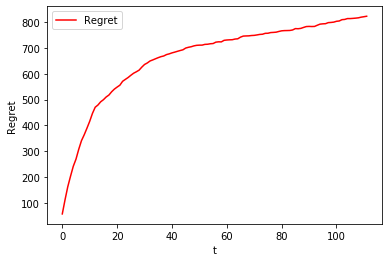

Clairvoyant value: 317.72032055226384


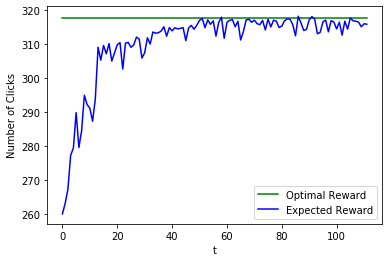

In [57]:
exp2.plot_regret()
print('Clairvoyant value: {}'.format(exp2.opt_super_arm_reward)) #clairvoyant value
exp2.plot_experiment()

## Non-Stationary Experiment

A non-stationary environment has the same configuration of the stationary one but the probability distribution of every arm can change over the time. Time is divided in phases and the reward functions are constant in each phase.

Our environment is divided by three phases (morning, evening and weekend) that compose the eleven _abrupt changes_ spread over the week. 

Standard bandit algorithms fail in non-stationary environments mainly because their bounds monotonically reduce. As a solution, we can use a sliding window to forget old samples. The regret lower bound is larger than in stationary environments since we are using less samples, but the comparison holds only on a the same stationary environment.

Non-stationary environments require permanent exploration otherwise the algorithm will suffer from a constant regret in the worst case. However this permanent exploration makes the regret to be much higher than the stationary case.

### Our Scenario
We use the **GP-Sliding Window-Thomposon Sampling** algorithm in each learner.
We ran a non-stationary experiment with the same configuration to easily compare the results with the stationary experiment.


**Combinatorial GP-SW-TS algorithm**

 At every time $t \in T$
 1. For every subcampaign *$j \in N$*, for every arm $a \in A$:
 
      $\tilde{n}_{a,j} \leftarrow Sample(\mathbb P(\mu_{a,j}=n_{a,j}))$
      
      
 2. Execute the Knapsack algorithm
 
      $\left\{\hat{y}_{j}\right\}_{j \in N} \leftarrow Knapsack(\left\{(v_{j} \tilde{n}_{a,j}(y), \bar{y}_{j}\right\}_{j \in N})$
 
 
 3. For every subcampaign *$j \in N$*, play arm $\hat{y}_{j}$
 
 
 4. Update the GP according to the **last observed rewards** (according to the sliding window size)

### Sliding window size setting

Let's execute three experiments with multiple learners having different sliding windows.

In [58]:
from experiment_3 import *
exp3 = Experiment_3(max_budget, n_arms, sample_factor, advertising_env_id, estimate_hyperparam=True)

Performing experiment:  1
Performing experiment:  2
Performing experiment:  3


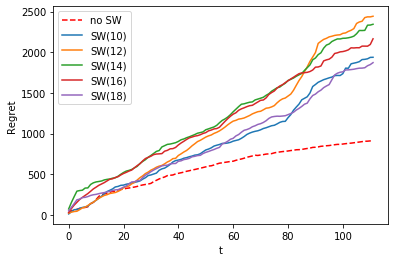

In [65]:
exp3.multiple_run(3, horizon=horizon, window_size=[10,12,14,16,18])
exp3.plot_multiple_regret()

We can observe that the a good sliding window size is 12, so let's set this dimension and re-run the same experiment 10 times to achieve more precise results.

In [ ]:
values = [horizon**0.3, horizon**0.4, 8,12,horizon**0.6,horizon**0.7]
for v in range(len(values)):
    print('sliding window size: {}'.format(int(values[v])))
    exp3.run(3, horizon=horizon, window_size=int(values[v]))
    exp3.plot_regret()

In [68]:
sliding_window = 16
n_experiments = 10
exp3.run(n_experiments, horizon, sliding_window)

Performing experiment:  1
Performing experiment:  2
Performing experiment:  3
Performing experiment:  4
Performing experiment:  5
Performing experiment:  6
Performing experiment:  7
Performing experiment:  8
Performing experiment:  9
Performing experiment:  10


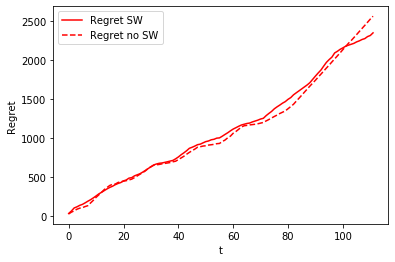

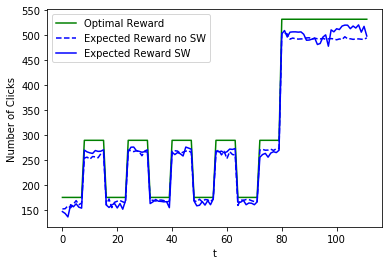

In [69]:
exp3.plot_regret()
exp3.plot_experiment()

The fact that the regret of the algorithm with and whithout are quite similar are probably due the phasing we have decided to use. Indeed as can be seen by the plot of the experiment, the problem is that the last phase has a higher reeward than the others, and so the algorithm does not have enough time to learn how to behave to reach the optimal reward in this new setting.